In [26]:
import sys
import os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [27]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

In [28]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [29]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [30]:

weight_decay_list = np.logspace(-4, 0, num=5)
lr_list = np.logspace(-4, 0, num=5)

results_val = {}
results_train = {}

for weight_decay in weight_decay_list:
    for lr in lr_list:
        val_acc_list, train_acc_list = __train(lr, weight_decay)
        print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
        key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
        results_val[key] = val_acc_list
        results_train[key] = train_acc_list

val acc:0.14 | lr:0.0001, weight decay:0.0001
val acc:0.16 | lr:0.001, weight decay:0.0001
val acc:0.75 | lr:0.01, weight decay:0.0001
val acc:0.86 | lr:0.1, weight decay:0.0001


/Users/chanshinpark/workspace/deepbottom/chapter6/../common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/Users/chanshinpark/workspace/deepbottom/chapter6/../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


val acc:0.09 | lr:1.0, weight decay:0.0001
val acc:0.13 | lr:0.0001, weight decay:0.001
val acc:0.22 | lr:0.001, weight decay:0.001
val acc:0.78 | lr:0.01, weight decay:0.001
val acc:0.81 | lr:0.1, weight decay:0.001
val acc:0.09 | lr:1.0, weight decay:0.001
val acc:0.15 | lr:0.0001, weight decay:0.01
val acc:0.25 | lr:0.001, weight decay:0.01
val acc:0.78 | lr:0.01, weight decay:0.01
val acc:0.79 | lr:0.1, weight decay:0.01
val acc:0.09 | lr:1.0, weight decay:0.01
val acc:0.09 | lr:0.0001, weight decay:0.1
val acc:0.14 | lr:0.001, weight decay:0.1
val acc:0.72 | lr:0.01, weight decay:0.1
val acc:0.53 | lr:0.1, weight decay:0.1
val acc:0.09 | lr:1.0, weight decay:0.1
val acc:0.16 | lr:0.0001, weight decay:1.0
val acc:0.14 | lr:0.001, weight decay:1.0
val acc:0.09 | lr:0.01, weight decay:1.0
val acc:0.09 | lr:0.1, weight decay:1.0
val acc:0.09 | lr:1.0, weight decay:1.0


=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.86) | lr:0.1, weight decay:0.0001
Best-2(val acc:0.81) | lr:0.1, weight decay:0.001
Best-3(val acc:0.79) | lr:0.1, weight decay:0.01
Best-4(val acc:0.78) | lr:0.01, weight decay:0.001
Best-5(val acc:0.78) | lr:0.01, weight decay:0.01
Best-6(val acc:0.75) | lr:0.01, weight decay:0.0001
Best-7(val acc:0.72) | lr:0.01, weight decay:0.1
Best-8(val acc:0.53) | lr:0.1, weight decay:0.1
Best-9(val acc:0.25) | lr:0.001, weight decay:0.01
Best-10(val acc:0.22) | lr:0.001, weight decay:0.001
Best-11(val acc:0.16) | lr:0.001, weight decay:0.0001
Best-12(val acc:0.16) | lr:0.0001, weight decay:1.0
Best-13(val acc:0.15) | lr:0.0001, weight decay:0.01
Best-14(val acc:0.14) | lr:0.0001, weight decay:0.0001
Best-15(val acc:0.14) | lr:0.001, weight decay:0.1
Best-16(val acc:0.14) | lr:0.001, weight decay:1.0
Best-17(val acc:0.13) | lr:0.0001, weight decay:0.001
Best-18(val acc:0.09) | lr:1.0, weight decay:0.0001
Best-19(val ac

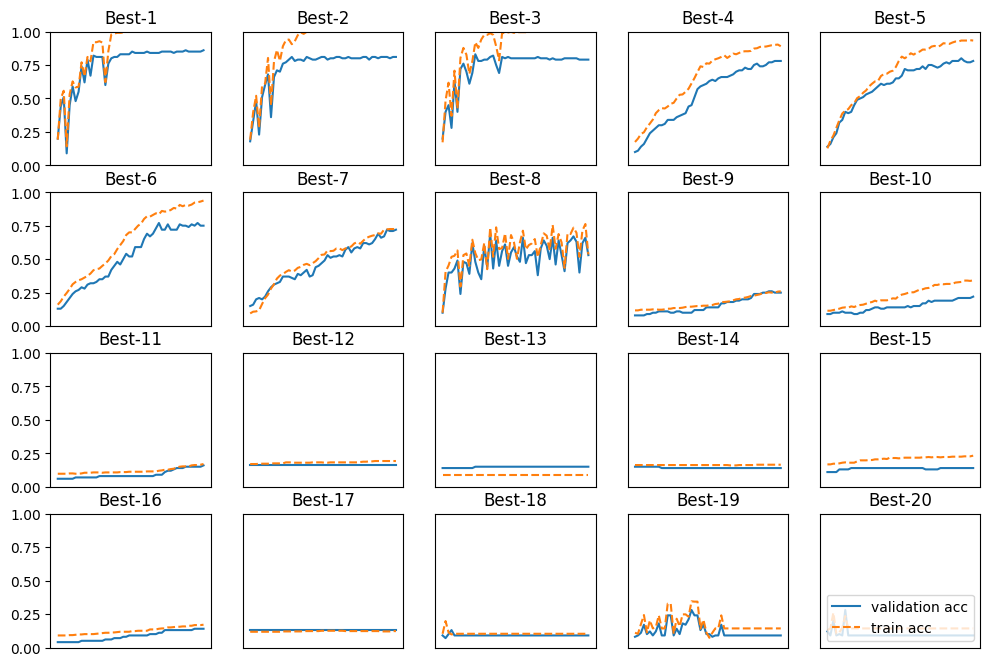

In [33]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
plt.figure(figsize=(12, 8))
for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list, label='validation acc')
    plt.plot(x, results_train[key], "--", label='train acc')
    i += 1

    if i >= graph_draw_num:
        break
plt.legend(loc='lower right')
plt.show()